# K-Means Clustering

In [1]:
# magic! (don't worry about this)
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# let us import some useful things
from lib import *
from classifiers import *
#from graphs import *
import numpy as np 
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans as km_official

First, let's start with some simulated data in 2 dimensions so that we can visualize how the algorithm works.

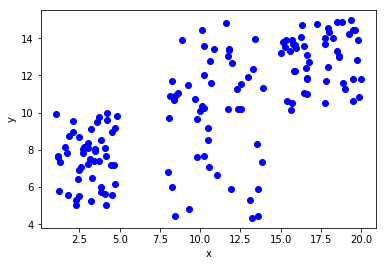

dimensions of data:150 x 2


In [23]:
np.random.seed(1234)
x1=np.random.uniform(1,5,[50,1])
y1=np.random.uniform(5,10,[50,1])

x2=np.random.uniform(15,20,[50,1])
y2=np.random.uniform(10,15,[50,1])

x3=np.random.uniform(8,14,[50,1])
y3=np.random.uniform(4,15,[50,1])


x=np.concatenate((x1,x2,x3),axis=0)
y=np.concatenate((y1,y2,y3),axis=0)

data=np.concatenate((x,y),axis=1)

plt.plot(x,y,'bo')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print("dimensions of data:"+str(data.shape[0])+" x " + str(data.shape[1]))

In [19]:
# Choose some value of k. This will be the number of classes that you will use to group the data. 

K = 3 #replace 'None' with a value for K

Now, we define all the helper functions we use in the K-means algorithm. If you feel like a taking on a bigger challenge, you can also write the algorithm yourself from scratch without using our helper function. To do this, write your code in the "kmeans" function in the file "classifiers_skeleton.py" 

## Step 1: Initialize k centroids

In [20]:
#make sure each centroid falls within the range of the observed data in the x & y dimension 
# hint: the following function may be useful to you. But, you can also use np.random.randint. 
def random_val_in_range(low,high): 
    return low+(float(high)-low)*np.random.random()

#inputs: data is your data matrix with samples in the rows and features in the columns. 
#output: an array of centroids. For example, if K=3, and we have 2-dimensional data (2 features), 
#we would return a np.array with dimensions 3x2

#TODO: write a function to randomly initialize K centroids in the data 
def initialize_centroids(data,K):
    samples,features = data.shape 
    centroids = np.zeros((K,features))#create an array to store your centroids. You will update these values. 
    np.random.seed(1234)
    # your code here! 
    
    return centroids 

In [21]:
# TODO: import the euclidean distance function that you wrote when we did the K-Nearest Neighbors algorithm
# from classifiers_skeleton.py. (hint: look at the import statements at the top of this file)
# You use "import" to pull in code from other Python files to avoid having to copy it over and over into multiple
# files. 

from classifiers_skeleton import euclidean_distance

## Step 2: Assign each data point to nearest cluster by calculating its distance to each centroid.

In [22]:
# TODO: write a function to find the nearest centroid to each point in a dataset 
# data in our example will be a 150x2 np.array and centroids will be a 3x2 np.array 
# hint: use your euclidean_distance function to loop over each point and loop over each centroid to calculate the 
# euclidean distance-- so 2 nested "for" loops. 
# although our specific example is 2 dimensional, your function should work with higher dimension data! 

#the output will be a list of labels 1 through K for each datapoint. 
def get_labels(centroids,data): 
    labels=[]  
    num_centroids,num_features_centroids=centroids.shape 
    num_datapoints,num_features_data=data.shape 
    #sanity check -- your centroids and your data points should have the same number of features! 
    print("num_features_centroids: " + str(num_features_centroids) + " should equal num_features_data: "+str(num_features_data))
    
    #your code here! 
    
    return labels 


## Step 3: Find new centroids by calculating the average of the assigned points.

In [8]:
#TODO: write a function that will update the K-means centroids based on the labels that were calculated above. 

#inputs: a np.array of size datapoints x features ( so 150 datapoints x 2 features in our example)
#labels: a list of K labels that were assigned to the datapoints. 
#K : number of clusters to generate

#output: a np.array of updated centroids. This array will be of size K x features (i.e. 3 centroids with 2 features
#will mean you return a 3x2 array)
def get_centroids(data,labels,K):
    num_datapoints,num_features=data.shape 
    centroids=np.zeros((K,num_features)) #update the values in this array as you calculate your centroids. 
    return centroids 



## Step 4: Check to see if the algorithm should stop. If not, repeat Step 2 and 3 until none of the cluster assignments change.

In [9]:
#TODO: Check to see if the algorithm should stop 
#There are 2 conditions for the algorithm to stop: 
# 1. The cluster labels for the datapoints have not changed since the previous iteration 
# 2. The algorithm has exceeded the maximum number of iterations 
 
#inputs: 
# cur_iter -- the current iteration of the algorithm 
# max_iter -- the maximum allowed iterations of the algorithm 
# labels_old -- the labels that were assigned to the datapoints in the previous iteration 
# labels_new -- the labels that have been assigned to the datapoints in the most recent iteration 

#output: 
#The function returns "True" if we are finished, "False" if we are not finished
def are_we_done(cur_iter,max_iter,labels_old,labels_new):
    if labels_old==None: #this is an edge case -- the first time we iterate through the algorithm,labels_old will be None
        return False 
    finished=False #if either of the conditions below are satisfied, change finished to True. 
    #check condition 1: 
    #your code here! 
    #check condition 2: 
    #your code here! 
    return finished 

## Main function for K-Means clustering algorithm.

In [10]:
#Putting everything together. 

#Here, we use the functions you have implemented above to write the full K-means clustering algorithm. 
#The kmeans function accepts a np.array of data and a value for K, and returns a list of labels for your datapoints. 
def kmeans(data,K,max_iter): 
    #randomly initialize the centroids 
    centroids=initialize_centroids(data,K)
    cur_iter=0 
    labels_old=None 
    while True: 
        #assign cluster labels 
        labels=get_labels(centroids,data)
        #check if we are done 
        finished=are_we_done(cur_iter,max_iter,labels_old,labels)
        if finished: 
            break #exit the loop 
        else: 
            cur_iter+=1 #update the iteration number 
            labels_old=labels # update the labels_old variable
            centroids=get_centroids(data,labels,K) #recalculate the centroids 
    #we have broken out of the while loop above, so we are finished. 
    #return the labels that have been calculated 
    return labels    

In [11]:
#We test the k-means algorithm on our example dataset 

#if you wrote your code from scratch, uncomment the following import statement: 
#from classifiers_skeleton import * 
labels=kmeans(data,K,max_iter)

NameError: name 'max_iter' is not defined

## Plotting!

In [24]:
#plot your labeled data 
plt.scatter(data[:,0],data[:,1],s=60,c=labels)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

NameError: name 'labels' is not defined

In [ ]:
#Now, let's compare your algorithm to the 'official' implementation from Python 
#you may not get exactly the same answer (think about why that would be), but the color groups in the 
#plots should look fairly similar. 

kobj=km_official(n_clusters=K)
labels_official=kobj.fit_predict(data)
plt.scatter(data[:,0],data[:,1],s=60,c=labels_official)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [17]:
#Run K-means clustering on our cancer dataset (this is a good way to test your implementation in high-dimensional space)
# load the data
microarray_file_name = '../data/prostate_normal_tumor_matrix.txt'
labels_file_name = '../data/prostate_normal_tumor_labels.txt'
data_store = DataSet(microarray_file_name, labels_file_name) # Data
data=data_store.all_data
true_labels=data_store.labels
print(data.shape)
print(len(true_labels))

(102, 12533)
102


In [ ]:
#Cluster your dataset into 2 classes 
K=2 
#your code here
labels=None #replace None with the labels generated by your k-means algorithm 

In [ ]:
#Plot the 'True' labels for the dataset 
from sklearn.manifold import TSNE 
#we project our 12533-dimensional data into 2 dimensions for visualization: 
model=TSNE(n_components=10,random_state=0)
data2d=model.fit_transform(data)
plt.scatter(data2d[:,0],data2d[:,1],s=60,c=true_labels)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
#Plot the labels generated by your algorithm 
plt.scatter(data2d[:,0],data2d[:,1],s=60,c=labels)
plt.xlabel("x")
plt.ylabel("y")
plt.show()